**Creando el dataset**

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

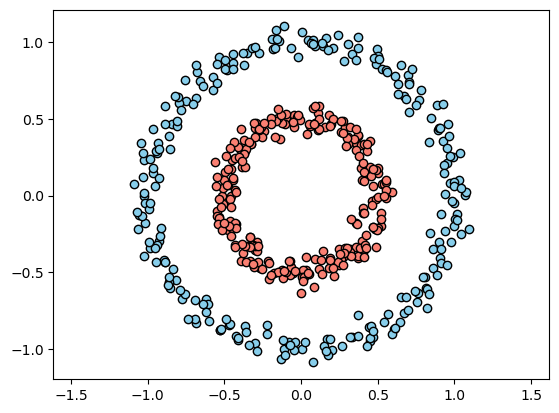

In [39]:
n = 500
p = 2
x,y = make_circles(n_samples=n, factor=0.5, noise=0.05)
plt.scatter(x[y==0, 0], x[y==0, 1], c='skyblue' , edgecolors='k')
plt.scatter(x[y==1, 0], x[y==1, 1], c='salmon',edgecolors='k')
plt.axis("equal")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
set(y_train)

{0, 1}

In [15]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
print(X_train.shape) # Debería mostrar (número de muestras de entrenamiento, número de sensores y valores de giroscopio)
print(y_train.shape) # Debería mostrar (número de muestras de entrenamiento, número de clases)

(400, 2)
(400, 2)


**Creando el modelo**

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu')) # Capa de entrada con N neuronas y función de activación ReLU
model.add(Dense(128, activation='relu')) # Capa oculta con 128 neuronas y función de activación ReLU
model.add(Dropout(0.5)) # Dropout para evitar el sobreajuste
model.add(Dense(2, activation='softmax')) # Capa de salida con 27 neuronas y función de activación softmax
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Función de pérdida, algoritmo de optimización y métricas de evaluación

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 8,770
Trainable params: 8,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test)) # Datos de entrenamiento, épocas, tamaño del lote y datos de validación

Epoch 1/50
13/13 [==============================] - 1s 22ms/step - loss: 0.6991 - accuracy: 0.4900 - val_loss: 0.6774 - val_accuracy: 0.7300
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.5500 - val_loss: 0.6733 - val_accuracy: 0.4700
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.5950 - val_loss: 0.6571 - val_accuracy: 0.6700
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6550 - val_loss: 0.6459 - val_accuracy: 0.6600
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6433 - accuracy: 0.7025 - val_loss: 0.6280 - val_accuracy: 0.7800
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.6650 - val_loss: 0.6167 - val_accuracy: 0.7100
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.7025 - val_loss: 0.5962 - val_accuracy: 0.7900
Epoch 8/50
13/13 [=

In [20]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test) # Datos de evaluación
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 1.0000
Loss:  0.03221584111452103
Accuracy:  1.0


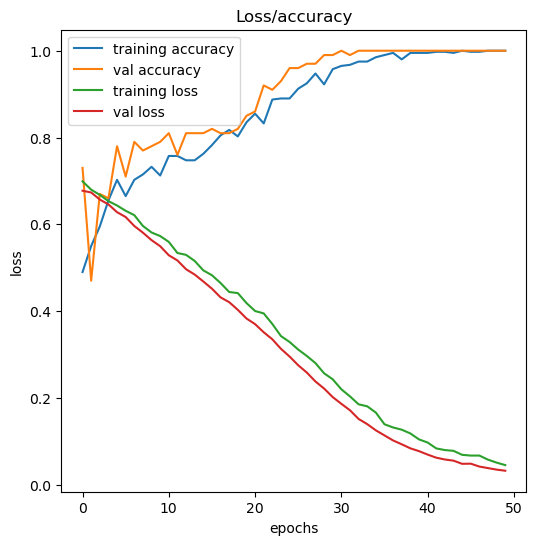

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [24]:
# Crear una malla de puntos que cubra el rango de valores de X_train
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [25]:
# Obtener las predicciones de la red neuronal para cada punto de la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1).reshape(xx.shape)

29/29 [==============================] - 0s 1ms/step


C:\Users\Francisco Meza\AppData\Local\Temp\ipykernel_6672\3919386114.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:, 0], X_train[:, 1], c='salmon', cmap='skyblue', edgecolor='k')


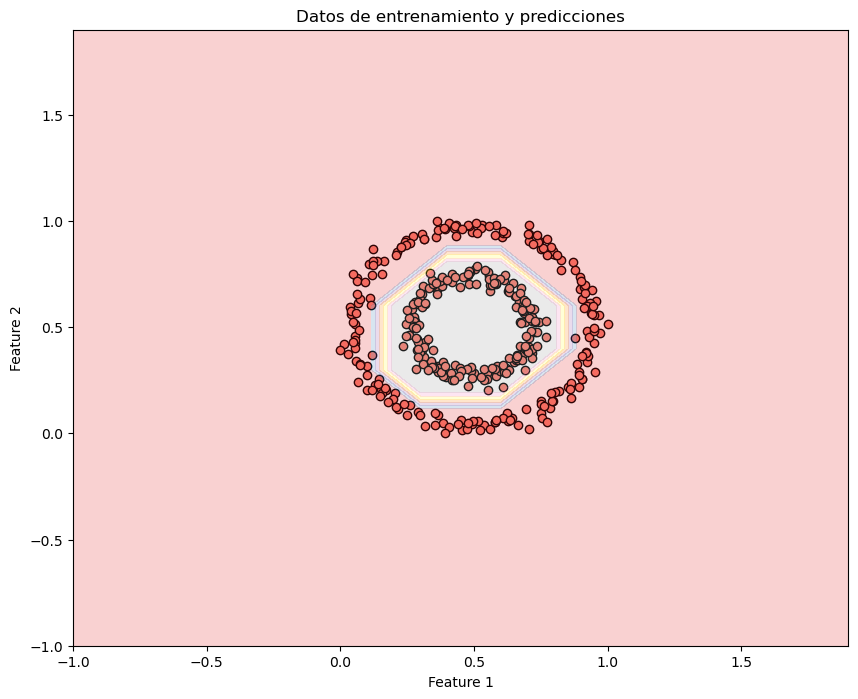

In [40]:
# Graficar los datos de entrenamiento y las predicciones en un gráfico de dispersión
plt.figure(figsize=(10,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c='salmon', cmap='skyblue', edgecolor='k')
#plt.scatter(X_train[y==1, 0], X_train[y==1, 1], c='skyblue', cmap=plt.cm.Set1, edgecolor='k')
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Set1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datos de entrenamiento y predicciones')
plt.show()